In [1]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 32.4 MB/s eta 0:00:00


In [8]:
from google.colab import files
uploaded = files.upload()

Saving 430-shape2.png to 430-shape2.png


430-shape2.png


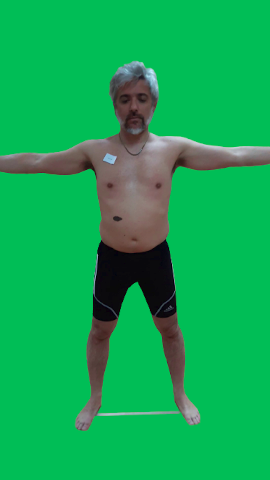

In [9]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read
images = {name: cv2.imread(name) for name in uploaded.keys()}

# Preview
for name, image in images.items():
  print(name)
  resize_and_show(image)

In [16]:
import mediapipe as mp

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [43]:
# landmarks colors
from typing import Mapping, Tuple
from mediapipe.python.solutions.drawing_utils import DrawingSpec
from mediapipe.python.solutions.pose import PoseLandmark

_THICKNESS_POSE_LANDMARKS = 2

_POSE_LANDMARKS_LEFT = frozenset([
    PoseLandmark.LEFT_EYE_INNER, PoseLandmark.LEFT_EYE,
    PoseLandmark.LEFT_EYE_OUTER, PoseLandmark.LEFT_EAR, PoseLandmark.MOUTH_LEFT,
    PoseLandmark.LEFT_SHOULDER, PoseLandmark.LEFT_ELBOW,
    PoseLandmark.LEFT_WRIST, PoseLandmark.LEFT_PINKY, PoseLandmark.LEFT_INDEX,
    PoseLandmark.LEFT_THUMB, PoseLandmark.LEFT_HIP, PoseLandmark.LEFT_KNEE,
    PoseLandmark.LEFT_ANKLE, PoseLandmark.LEFT_HEEL,
    PoseLandmark.LEFT_FOOT_INDEX
])

_POSE_LANDMARKS_RIGHT = frozenset([
    PoseLandmark.RIGHT_EYE_INNER, PoseLandmark.RIGHT_EYE,
    PoseLandmark.RIGHT_EYE_OUTER, PoseLandmark.RIGHT_EAR,
    PoseLandmark.MOUTH_RIGHT, PoseLandmark.RIGHT_SHOULDER,
    PoseLandmark.RIGHT_ELBOW, PoseLandmark.RIGHT_WRIST,
    PoseLandmark.RIGHT_PINKY, PoseLandmark.RIGHT_INDEX,
    PoseLandmark.RIGHT_THUMB, PoseLandmark.RIGHT_HIP, PoseLandmark.RIGHT_KNEE,
    PoseLandmark.RIGHT_ANKLE, PoseLandmark.RIGHT_HEEL,
    PoseLandmark.RIGHT_FOOT_INDEX
])


def get_my_pose_landmarks_style() -> Mapping[int, DrawingSpec]:
  pose_landmark_style = {}
  left_spec = DrawingSpec(
      color=(0,0,255), thickness=_THICKNESS_POSE_LANDMARKS) #BGR
  right_spec = DrawingSpec(
      color=(0,0,255), thickness=_THICKNESS_POSE_LANDMARKS)
  for landmark in _POSE_LANDMARKS_LEFT:
    pose_landmark_style[landmark] = left_spec
  for landmark in _POSE_LANDMARKS_RIGHT:
    pose_landmark_style[landmark] = right_spec
  pose_landmark_style[PoseLandmark.NOSE] = DrawingSpec(
      color=(0,0,255), thickness=_THICKNESS_POSE_LANDMARKS)
  return pose_landmark_style

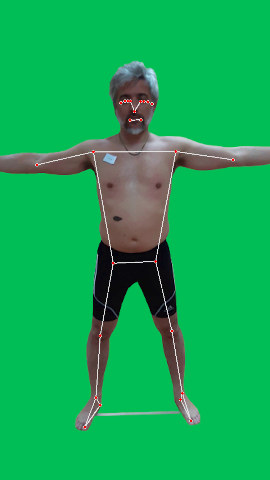

In [44]:
# Run Pose model and draw landmarks
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for name, image in images.items():
    # Convert the BGR image to RGB and process
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print nose landmark
    image_hight, image_width, _ = image.shape
    if not results.pose_landmarks:
      continue

    # Draw pose landmarks
    #print(f'Pose landmarks of {name}:')
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        #landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        landmark_drawing_spec=get_my_pose_landmarks_style())
    resize_and_show(annotated_image)